In [1300]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from xgboost import XGBRegressor
from sklearn.svm import SVR
# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing Our Data

In [1301]:
# Load our dataset 
df=pd.read_csv('S&P500-USD.csv')

In [1302]:
df.shape

(2013, 7)

In [1303]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  2013
Total number of fields present in the dataset:  7


In [1304]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df["Close"] = df["Close"].str.replace(",","").astype(float)
df["Open"] = df["Open"].str.replace(",","").astype(float)
df["High"] = df["High"].str.replace(",","").astype(float)
df["Low"] = df["Low"].str.replace(",","").astype(float)
df["Adj Close"] = df["Adj Close"].str.replace(",","").astype(float)
df["Volume"] = df["Volume"].str.replace(",","").astype(float)
df.sort_values(by='Date',ascending=False)
df = df[::-1]

In [1305]:
df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2012,2015-09-01,1970.09,1970.09,1903.07,1913.85,1913.85,4.371850e+09
2011,2015-09-02,1916.52,1948.91,1916.52,1948.86,1948.86,3.742620e+09
2010,2015-09-03,1950.79,1975.01,1944.72,1951.13,1951.13,3.520700e+09
2009,2015-09-04,1947.76,1947.76,1911.21,1921.22,1921.22,3.167090e+09
2008,2015-09-08,1927.30,1970.42,1927.30,1969.41,1969.41,3.548650e+09


In [1306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 2012 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2013 non-null   datetime64[ns]
 1   Open       2013 non-null   float64       
 2   High       2013 non-null   float64       
 3   Low        2013 non-null   float64       
 4   Close      2013 non-null   float64       
 5   Adj Close  2013 non-null   float64       
 6   Volume     2013 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 110.2 KB


In [1307]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2013,2013.000000,2013.000000,2013.000000,2013.00000,2013.00000,2.013000e+03
mean,2019-08-30 22:53:28.345752576,3156.413607,3174.073656,3137.421679,3156.93383,3156.93383,4.060767e+09
min,2015-09-01 00:00:00,1833.400000,1847.000000,1810.100000,1829.08000,1829.08000,1.296530e+09
25%,2017-08-30 00:00:00,2467.400000,2474.930000,2459.200000,2469.91000,2469.91000,3.438900e+09
50%,2019-08-30 00:00:00,2918.550000,2931.420000,2904.510000,2919.40000,2919.40000,3.857290e+09
75%,2021-08-30 00:00:00,3953.220000,3975.300000,3922.030000,3955.00000,3955.00000,4.445780e+09
max,2023-08-30 00:00:00,4804.510000,4818.620000,4780.040000,4796.56000,4796.56000,9.976520e+09
std,NaN,828.832700,834.800575,822.872752,829.03350,829.03350,9.952771e+08


In [1308]:
# Checking for Null Values
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

# If dataset had null values we can use this code to drop all the null values present in the dataset

# df= df.dropna()

Null Values: 0
NA values: False


In [1309]:
# Final shape of the dataset after dealing with null values 

df.shape

(2013, 7)

In [1310]:
# Printing the start date and End date of the dataset
# For our case we have taken data from 1st Sept 2015 to 31th Aug 2023
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2015-09-01 00:00:00
Ending Date 2023-08-30 00:00:00


# Exploratory Data Analysis

# Analysis of Year 2015

In [1311]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # changing to datetime format for simplicity

y_2015 = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2012,2015-09-01,1970.09,1970.09,1903.07,1913.85
2011,2015-09-02,1916.52,1948.91,1916.52,1948.86
2010,2015-09-03,1950.79,1975.01,1944.72,1951.13
2009,2015-09-04,1947.76,1947.76,1911.21,1921.22
2008,2015-09-08,1927.30,1970.42,1927.30,1969.41
...,...,...,...,...,...
1932,2015-12-24,2063.52,2067.36,2058.73,2060.99
1931,2015-12-28,2057.77,2057.77,2044.20,2056.50
1930,2015-12-29,2060.54,2081.56,2060.54,2078.36
1929,2015-12-30,2077.34,2077.34,2061.97,2063.36


In [1312]:
# Grouping the data based on the month and finding the mean of opening and closing price for the respective month

monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,1947.264286,1944.402381


In [1313]:
# Visual Representation of the above table
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1314]:
# Visualizing the maximum high price and minimum low price for each month

y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1315]:
# Visualizing all the prices
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2016

In [1316]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2016 = df.loc[(df['Date'] >= '2016-01-01')
                     & (df['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1927,2016-01-04,2038.20,2038.20,1989.68,2012.66
1926,2016-01-05,2013.78,2021.94,2004.17,2016.71
1925,2016-01-06,2011.71,2011.71,1979.05,1990.26
1924,2016-01-07,1985.32,1985.32,1938.83,1943.09
1923,2016-01-08,1945.97,1960.40,1918.46,1922.03
...,...,...,...,...,...
1680,2016-12-23,2260.25,2263.79,2258.84,2263.79
1679,2016-12-27,2266.23,2273.82,2266.15,2268.88
1678,2016-12-28,2270.23,2271.31,2249.11,2249.92
1677,2016-12-29,2249.50,2254.51,2244.56,2249.26


In [1317]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1924.638947,1918.597895
February,1904.805000,1904.418500
March,2015.612727,2021.954091
April,2075.073810,2075.535238
May,2064.094762,2065.550476
June,2083.469545,2083.891364
July,2145.646500,2148.902000
August,2177.612609,2177.482174
September,2157.573810,2157.690952


In [1318]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1319]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1320]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'], 
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2017

In [1321]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2017 = df.loc[(df['Date'] >= '2017-01-01')
                     & (df['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1675,2017-01-03,2251.57,2263.88,2245.13,2257.83
1674,2017-01-04,2261.60,2272.82,2261.60,2270.75
1673,2017-01-05,2268.18,2271.50,2260.45,2269.00
1672,2017-01-06,2271.14,2282.10,2264.06,2276.98
1671,2017-01-09,2273.59,2275.49,2268.90,2268.90
...,...,...,...,...,...
1429,2017-12-22,2684.22,2685.35,2678.13,2683.34
1428,2017-12-26,2679.09,2682.74,2677.96,2680.50
1427,2017-12-27,2682.10,2685.64,2678.91,2682.62
1426,2017-12-28,2686.10,2687.66,2682.69,2687.54


In [1322]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,2273.532000,2275.116000
February,2325.585263,2329.910526
March,2366.868696,2366.822174
April,2360.150000,2359.309474
May,2394.470000,2395.345909
June,2434.683636,2433.985455
July,2453.039500,2454.102500
August,2456.750000,2456.223043
September,2491.332500,2492.841000


In [1323]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1324]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1325]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'], 
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2018

In [1326]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2018 = df.loc[(df['Date'] >= '2018-01-01')
                     & (df['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1424,2018-01-02,2683.73,2695.89,2682.36,2695.81
1423,2018-01-03,2697.85,2714.37,2697.77,2713.06
1422,2018-01-04,2719.31,2729.29,2719.07,2723.99
1421,2018-01-05,2731.33,2743.45,2727.92,2743.15
1420,2018-01-08,2742.67,2748.51,2737.60,2747.71
...,...,...,...,...,...
1178,2018-12-24,2400.56,2410.34,2351.10,2351.10
1177,2018-12-26,2363.12,2467.76,2346.58,2467.70
1176,2018-12-27,2442.50,2489.10,2397.94,2488.83
1175,2018-12-28,2498.77,2520.27,2472.89,2485.74


In [1327]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,2785.686667,2789.803810
February,2710.269474,2705.155263
March,2707.860000,2702.773810
April,2657.641429,2653.625238
May,2699.121818,2701.493636
June,2754.971429,2754.352857
July,2789.537143,2793.643333
August,2854.545652,2857.820435
September,2901.570000,2901.500526


In [1328]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1329]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1330]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [1331]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                     & (df['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1173,2019-01-02,2476.96,2519.49,2467.47,2510.03
1172,2019-01-03,2491.92,2493.14,2443.96,2447.89
1171,2019-01-04,2474.33,2538.07,2474.33,2531.94
1170,2019-01-07,2535.61,2566.16,2524.56,2549.69
1169,2019-01-08,2568.11,2579.82,2547.56,2574.41
...,...,...,...,...,...
926,2019-12-24,3225.45,3226.43,3220.51,3223.38
925,2019-12-26,3227.20,3240.08,3227.20,3239.91
924,2019-12-27,3247.23,3247.93,3234.37,3240.02
923,2019-12-30,3240.09,3240.92,3216.57,3221.29


In [1332]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,2597.898571,2607.390000
February,2750.142105,2754.864211
March,2803.595238,2803.983810
April,2900.810476,2903.800000
May,2855.352727,2854.705909
June,2887.686000,2890.166000
July,2995.792273,2996.113636
August,2901.220000,2897.450455
September,2982.083000,2982.156000


In [1333]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1334]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1335]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020

In [1336]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2020 = df.loc[(df['Date'] >= '2020-01-01')
                     & (df['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
921,2020-01-02,3244.67,3258.14,3235.53,3257.85
920,2020-01-03,3226.36,3246.15,3222.34,3234.85
919,2020-01-06,3217.55,3246.84,3214.64,3246.28
918,2020-01-07,3241.86,3244.91,3232.43,3237.18
917,2020-01-08,3238.59,3267.07,3236.67,3253.05
...,...,...,...,...,...
673,2020-12-24,3694.03,3703.82,3689.32,3703.06
672,2020-12-28,3723.03,3740.51,3723.03,3735.36
671,2020-12-29,3750.01,3756.12,3723.31,3727.04
670,2020-12-30,3736.19,3744.63,3730.21,3732.04


In [1337]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3276.805714,3278.202857
February,3285.607368,3277.314211
March,2653.187727,2652.393636
April,2758.609048,2761.975238
May,2919.705500,2919.608500
June,3106.273636,3104.660909
July,3203.598636,3207.619091
August,3384.890000,3391.710000
September,3373.977143,3365.516667


In [1338]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1339]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1340]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [1341]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2021 = df.loc[(df['Date'] >= '2021-01-01')
                     & (df['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
668,2021-01-04,3764.61,3769.99,3662.71,3700.65
667,2021-01-05,3698.02,3737.83,3695.07,3726.86
666,2021-01-06,3712.20,3783.04,3705.34,3748.14
665,2021-01-07,3764.71,3811.55,3764.71,3803.79
664,2021-01-08,3815.05,3826.69,3783.60,3824.68
...,...,...,...,...,...
422,2021-12-23,4703.96,4740.74,4703.96,4725.79
421,2021-12-27,4733.99,4791.49,4733.99,4791.19
420,2021-12-28,4795.49,4807.02,4780.04,4786.35
419,2021-12-29,4788.64,4804.06,4778.08,4793.06


In [1342]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3797.387368,3793.748421
February,3878.793158,3883.432105
March,3906.684783,3910.508261
April,4133.939524,4141.176190
May,4167.330000,4167.849500
June,4236.976818,4238.489545
July,4358.000952,4363.712857
August,4448.834091,4453.965909
September,4457.234762,4445.543333


In [1343]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1344]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1345]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2022

In [1346]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2022 = df.loc[(df['Date'] >= '2022-01-01')
                     & (df['Date'] < '2022-12-31')]

y_2022.drop(y_2015[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
416,2022-01-03,4778.14,4796.64,4758.17,4796.56
415,2022-01-04,4804.51,4818.62,4774.27,4793.54
414,2022-01-05,4787.99,4797.70,4699.44,4700.58
413,2022-01-06,4693.39,4725.01,4671.26,4696.05
412,2022-01-07,4697.66,4707.95,4662.74,4677.03
...,...,...,...,...,...
170,2022-12-23,3815.11,3845.80,3797.01,3844.82
169,2022-12-27,3843.34,3846.65,3813.22,3829.25
168,2022-12-28,3829.56,3848.32,3780.78,3783.22
167,2022-12-29,3805.45,3858.19,3805.45,3849.28


In [1347]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,4585.263000,4573.815500
February,4436.878947,4435.980526
March,4388.294348,4391.265217
April,4409.360500,4391.296000
May,4037.780000,4040.360000
June,3908.924286,3898.946667
July,3893.241000,3911.729500
August,4164.375652,4158.563043
September,3860.814286,3850.520476


In [1348]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1349]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1350]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2023

In [1351]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2023 = df.loc[(df['Date'] >= '2023-01-01')
                     & (df['Date'] < '2023-09-01')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
165,2023-01-03,3853.29,3878.46,3794.33,3824.14
164,2023-01-04,3840.36,3873.16,3815.77,3852.97
163,2023-01-05,3839.74,3839.74,3802.42,3808.10
162,2023-01-06,3823.37,3906.19,3809.56,3895.08
161,2023-01-09,3910.82,3950.57,3890.42,3892.09
...,...,...,...,...,...
4,2023-08-24,4455.16,4458.30,4375.55,4376.31
3,2023-08-25,4389.38,4418.46,4356.29,4405.71
2,2023-08-28,4426.03,4439.56,4414.98,4433.31
1,2023-08-29,4432.75,4500.14,4431.68,4497.63


In [1352]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3948.579500,3960.656500
February,4079.343684,4079.684737
March,3965.184783,3968.559130
April,4116.727368,4121.467368
May,4148.423182,4146.173182
June,4333.507619,4345.372857
July,4505.434000,4508.075500
August,4458.850909,4455.072273
September,NaN,NaN


In [1353]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='S&P500 Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='S&P500 Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between S&P500 open and close price')
fig.show()

In [1354]:
y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2023.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='S&P500 high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='S&P500 low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low S&P500 price')
fig.show()

In [1355]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'], 
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2015-2023

In [1356]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2015-09-01')
                     & (df['Date'] <= '2023-09-01')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2012,2015-09-01,1970.09,1970.09,1903.07,1913.85
2011,2015-09-02,1916.52,1948.91,1916.52,1948.86
2010,2015-09-03,1950.79,1975.01,1944.72,1951.13
2009,2015-09-04,1947.76,1947.76,1911.21,1921.22
2008,2015-09-08,1927.30,1970.42,1927.30,1969.41
...,...,...,...,...,...
4,2023-08-24,4455.16,4458.30,4375.55,4376.31
3,2023-08-25,4389.38,4418.46,4356.29,4405.71
2,2023-08-28,4426.03,4439.56,4414.98,4433.31
1,2023-08-29,4432.75,4500.14,4431.68,4497.63


In [1357]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3147.417391,3148.507267
February,3163.149542,3163.064444
March,3117.280449,3118.719775
April,3167.456687,3166.987914
May,3153.071588,3153.665235
June,3214.327895,3214.725380
July,3291.759759,3296.643313
August,3345.833128,3345.925698
September,3026.416402,3022.351220


In [1358]:
names = cycle(['S&P500 Open Price','S&P500 Close Price','S&P500 High Price','S&P500 Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'S&P500 value'})
fig.update_layout(title_text='S&P500 analysis chart', font_size=15, font_color='black',legend_title_text='S&P500 Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building Models and Data pre-processing

First Step is Preparing Data for Training and Testing

In [1359]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2013, 2)


In [1360]:
closedf = closedf[closedf['Date'] >= '2015-09-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  2013


In [1361]:
closedf

,Date,Close
2012,2015-09-01,1913.85
2011,2015-09-02,1948.86
2010,2015-09-03,1951.13
2009,2015-09-04,1921.22
2008,2015-09-08,1969.41
...,...,...
4,2023-08-24,4376.31
3,2023-08-25,4405.71
2,2023-08-28,4433.31
1,2023-08-29,4497.63


In [1362]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict S&P500 close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [1363]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2013, 1)


* ### Slicing data into Training set and Testing set

In [1364]:
# we keep the training set as 90% and 10% testing set

training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1509, 1)
test_data:  (504, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [1365]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [1366]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1493, 15)
y_train:  (1493,)
X_test:  (488, 15)
y_test (488,)


# XGBoost model

In [1367]:
# Building Model
# Building Model

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1368]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Mean Squared Error - MSE : " + str(mean_squared_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.026903631912521642
Mean Squared Error - MSE : 0.00133515789423293
Root Mean squared Error - RMSE : 0.03653981245481331


In [1369]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1493, 1)
Test data prediction: (488, 1)


In [1370]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [1371]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price using XGBoost',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1372]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [1373]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [1374]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1375]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ## R square score

In [1376]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9999478599223592
Test data R2 score: 0.8652703268586672


# LSTM Model

In [1377]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1493, 15, 1)
X_test:  (488, 15, 1)


In [1378]:
model=Sequential()
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.add(LSTM(5, input_shape=(None, 1), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1)) 

model.add(Dense(1))


model.compile(loss="mean_squared_error",optimizer="adam")

In [1379]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
47/47 [==============================] - 1s 5ms/step - loss: 0.1439 - val_loss: 0.4793
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0750 - val_loss: 0.2242
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0558
Epoch 4/20
 1/47 [..............................] - ETA: 0s - loss: 0.0223

47/47 [==============================] - 0s 4ms/step - loss: 0.0303 - val_loss: 0.0297
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0157
Epoch 6/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0113
Epoch 7/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.0101
Epoch 8/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.0094
Epoch 9/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0092
Epoch 10/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.0078
Epoch 11/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0071
Epoch 12/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0066
Epoch 13/20
47/47 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.0059
Epoch 14/20
47/47 [========

- ### Plotting Loss vs Validation loss 

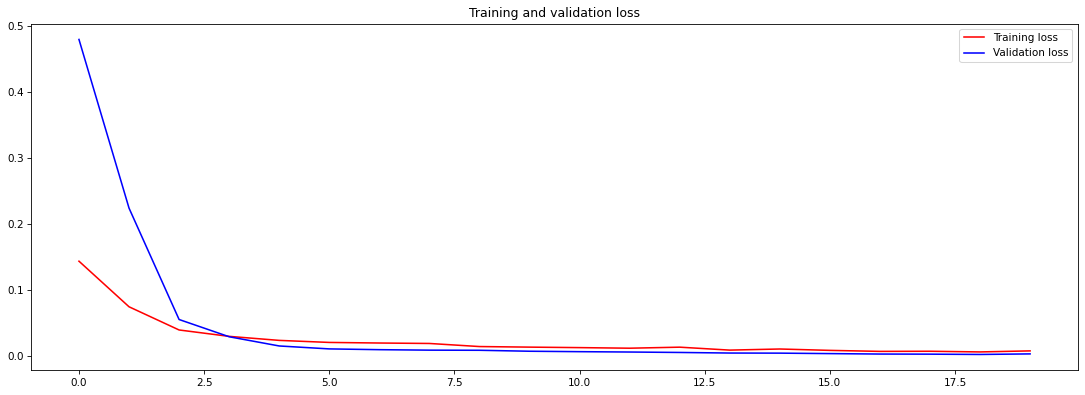

<Figure size 1350x450 with 0 Axes>

In [1380]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [1381]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

16/16 [==============================] - 0s 778us/step


((1493, 1), (488, 1))

In [1382]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, test_predict)))
print("Mean Squared Error - MSE : " + str(mean_squared_error(y_test, test_predict)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, test_predict))))

Mean Absolute Error - MAE : 0.043185360743328155
Mean Squared Error - MSE : 0.00295949226095647
Root Mean squared Error - RMSE : 0.054401215620208984


- # Model Evaluation

In [1383]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## R square score

In [1384]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9611964337665835
Test data R2 score: 0.7013604923865848


- # Comparision of original stock close price and predicted close price

In [1385]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1386]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))
print(lst_output)

Output of predicted next days:  30
[[0.9168821573257446], [0.9183861017227173], [0.920342206954956], [0.9219810962677002], [0.9255988597869873], [0.9307401180267334], [0.9373887777328491], [0.944745659828186], [0.9517782926559448], [0.9598650932312012], [0.9673073291778564], [0.9772346019744873], [0.9870421886444092], [0.9968222379684448], [1.0054198503494263], [1.0143077373504639], [1.0230175256729126], [1.0325175523757935], [1.042838215827942], [1.0540764331817627], [1.06611967086792], [1.0788851976394653], [1.0923042297363281], [1.106370210647583], [1.121201992034912], [1.1367756128311157], [1.1531767845153809], [1.1702866554260254], [1.1882450580596924], [1.2071737051010132]]


In [1387]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [1388]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1389]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Prophet

In [1390]:
import prophet
from prophet import Prophet
# print version number
print('Prophet %s' % prophet.__version__)
df_p = pd.DataFrame()

Prophet 1.1.4


In [1391]:
df_p['ds'] = df[['Date']]
#df_p['y'] = df[['Close']]
df_p['y'] = scaler.fit_transform(np.array(df[['Close']]).reshape(-1,1))
model = Prophet()
model.fit(df_p)

10:14:25 - cmdstanpy - INFO - Chain [1] start processing


10:14:26 - cmdstanpy - INFO - Chain [1] done processing


In [1392]:
future_dates = model.make_future_dataframe(periods=30)

In [1393]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
f = forecast['yhat']
g=forecast[forecast['ds']>'2023-08-31']
g=g['yhat']


In [1394]:
predicted_values = forecast['yhat']

squared_differences = (df_p['y'] - predicted_values[:-30]) ** 2

mse = np.mean(squared_differences)

rmse = np.sqrt(mse)
print("Mean Squared Error - MSE : ",mse)
print("Root Mean squared Error - RMSE : ", rmse)

Mean Squared Error - MSE :  0.2878317414238454
Root Mean squared Error - RMSE :  0.5364995260238776


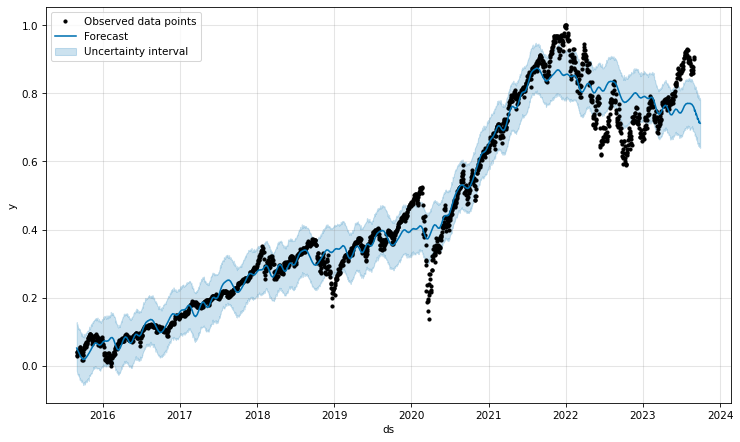

In [1395]:
fig2 = model.plot(forecast, uncertainty=True)
#show legend
plt.legend(loc='upper left')

In [1396]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(g).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1397]:
names = cycle(['Close price'])

fig = px.line(f,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ## R square score for regression

In [1398]:

print("Train data R2 score:", r2_score(predicted_values[:-30], df_p['y']))
#print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9593487869485879


# ARIMA

In [1399]:
S_and_P = df

In [1400]:
S_and_P.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2012,2015-09-01,1970.09,1970.09,1903.07,1913.85,1913.85,4.371850e+09
2011,2015-09-02,1916.52,1948.91,1916.52,1948.86,1948.86,3.742620e+09
2010,2015-09-03,1950.79,1975.01,1944.72,1951.13,1951.13,3.520700e+09
2009,2015-09-04,1947.76,1947.76,1911.21,1921.22,1921.22,3.167090e+09
2008,2015-09-08,1927.30,1970.42,1927.30,1969.41,1969.41,3.548650e+09


In [1401]:
S_and_P=S_and_P.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
# Drop rows with NaN values in 'S_and_P Close Price' column
S_and_P = S_and_P.dropna(subset=['Close'])
S_and_P.rename(columns={'Close': 'S_and_P Close Price'}, inplace=True)
S_and_P['Date'] = pd.to_datetime(S_and_P['Date'], errors='coerce')
S_and_P

,Date,S_and_P Close Price
2012,2015-09-01,1913.85
2011,2015-09-02,1948.86
2010,2015-09-03,1951.13
2009,2015-09-04,1921.22
2008,2015-09-08,1969.41
...,...,...
4,2023-08-24,4376.31
3,2023-08-25,4405.71
2,2023-08-28,4433.31
1,2023-08-29,4497.63


In [1402]:
S_and_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 2012 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2013 non-null   datetime64[ns]
 1   S_and_P Close Price  2013 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.6 KB


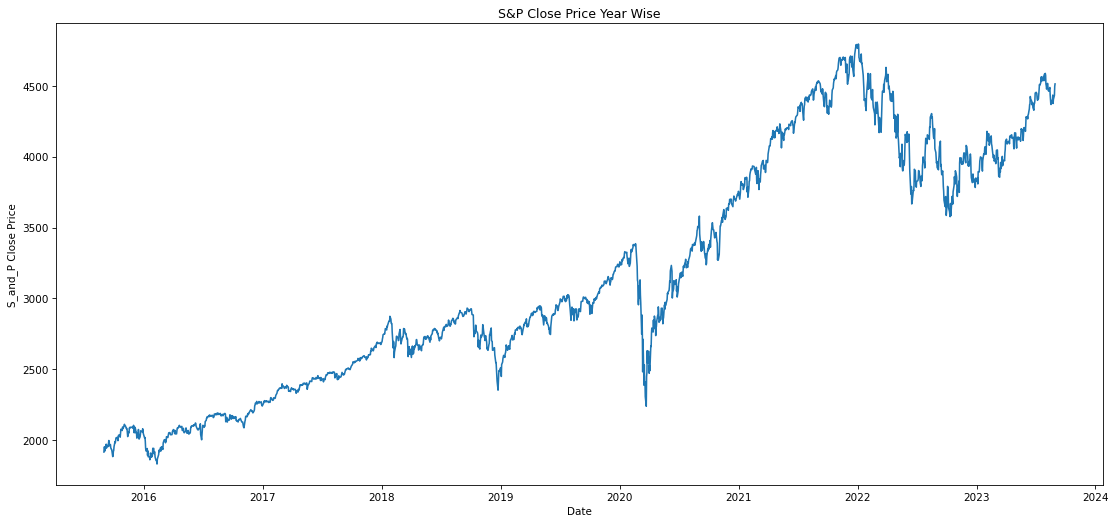

In [1403]:
plt.figure(figsize = (18,8))
sns.lineplot(data=S_and_P, x="Date", y="S_and_P Close Price")
plt.title('S&P Close Price Year Wise')
plt.show()

In [1404]:
S_and_P_eda = S_and_P.copy()
S_and_P_eda.set_index('Date', inplace=True)

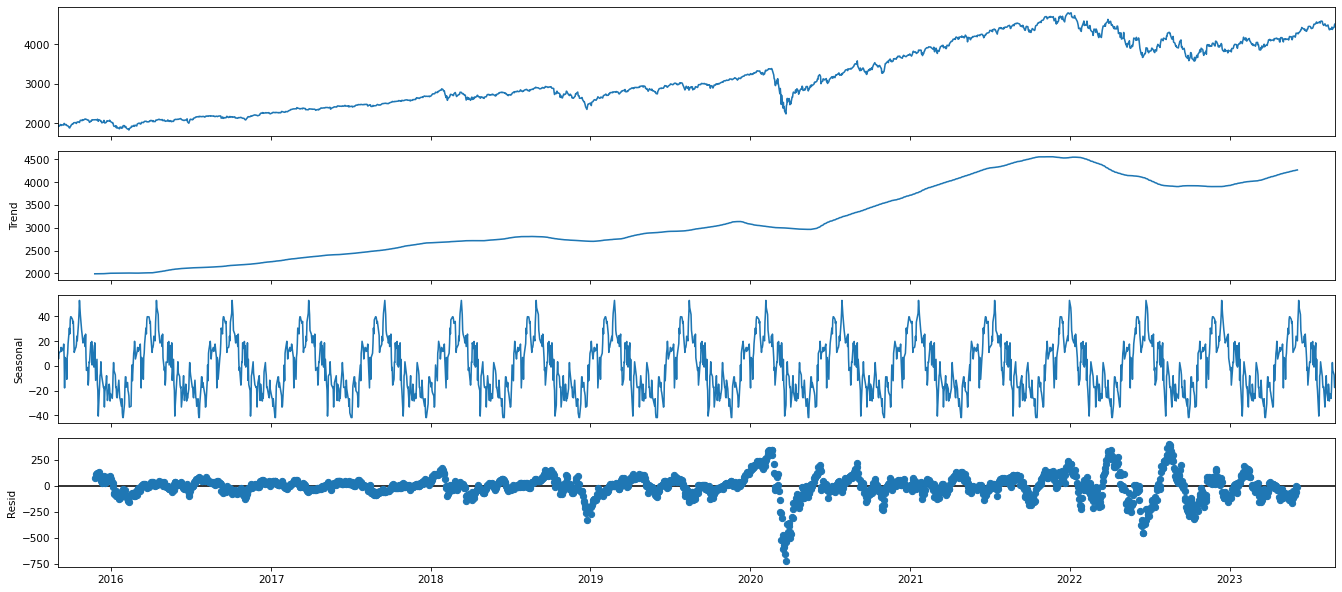

In [1405]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(S_and_P_eda, model='additive', period=120)
result.plot()
plt.show()

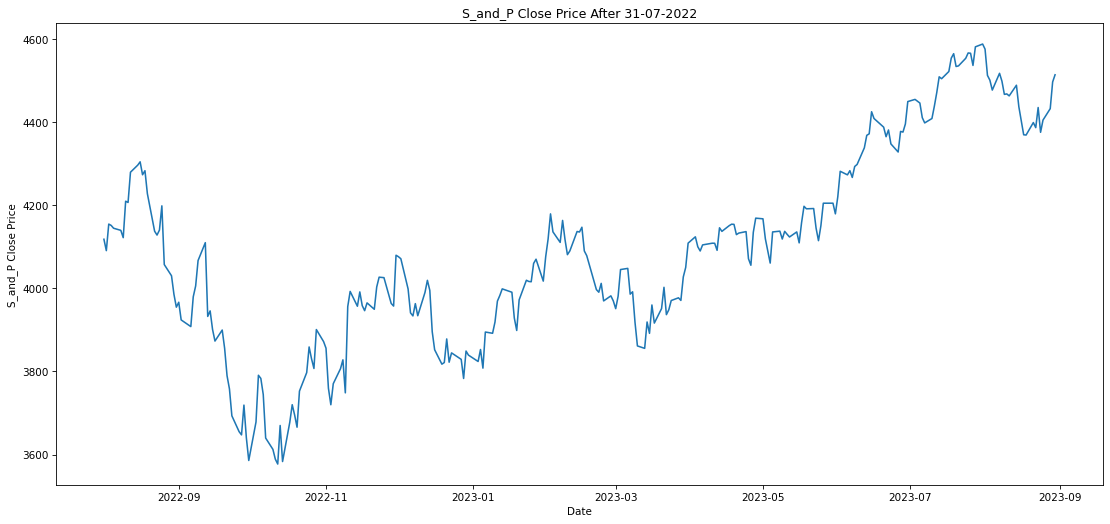

In [1406]:
S_and_P['Date'] = pd.to_datetime(S_and_P['Date'])

# Filter data for dates after 31-07-2021
filtered_data = S_and_P[S_and_P['Date'] > '2022-07-31']

# Plot the filtered data
plt.figure(figsize=(18, 8))
sns.lineplot(data=filtered_data, x="Date", y="S_and_P Close Price")
plt.title('S_and_P Close Price After 31-07-2022')
plt.show()

In [1407]:
training_size=int(len(S_and_P)*0.90)
print(training_size)
X_train = S_and_P[:training_size]
X_test = S_and_P[training_size:]

print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

1811
X_train Shape (1811, 2)
X_test Shape (202, 2)


In [1408]:
X_train = X_train[['Date', 'S_and_P Close Price']]
X_test = X_test[['Date', 'S_and_P Close Price']]

X_train.set_index('Date', inplace=True)
X_test.set_index('Date', inplace=True)

In [1409]:
index_1_months = pd.date_range(X_test.index[-1], freq='D', periods=32)
index_1_months = index_1_months[2:]
index_1_months

DatetimeIndex(['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12',
               '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-16',
               '2023-09-17', '2023-09-18', '2023-09-19', '2023-09-20',
               '2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24',
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30'],
              dtype='datetime64[ns]', freq='D')

In [1410]:
def define_d(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

define_d(X_train)


ADF Test Statistic : -1.1795677697310234
p-value : 0.6823228127541014
#Lags Used : 11
Number of Observations : 1799
Critical Value : {'1%': -3.433990164137254, '5%': -2.8631479299063405, '10%': -2.567626009684832}
** Indicating It Is Non-Stationary **


In [1411]:
data_diff = X_train.diff()
data_diff.dropna(inplace=True)
define_d(data_diff)

ADF Test Statistic : -12.276857105039046
p-value : 8.394424556759519e-23
#Lags Used : 10
Number of Observations : 1799
Critical Value : {'1%': -3.433990164137254, '5%': -2.8631479299063405, '10%': -2.567626009684832}
** Data Is Stationary **


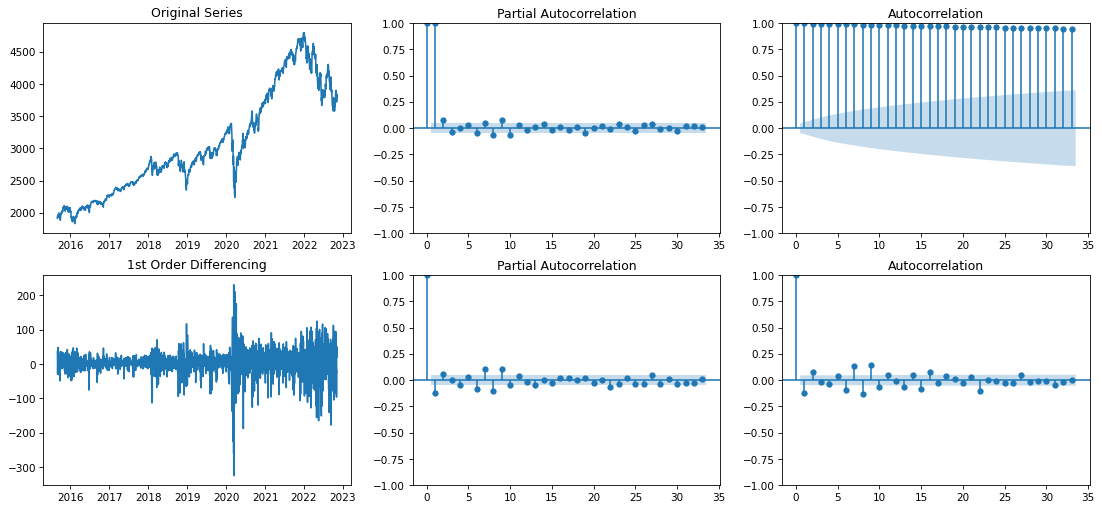

In [1412]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(X_train); axes[0, 0].set_title('Original Series')
plot_pacf(X_train, ax=axes[0, 1])
plot_acf(X_train, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(X_train.diff().dropna(), ax=axes[1, 1])
plot_acf(X_train.diff().dropna(), ax=axes[1, 2])

plt.show()

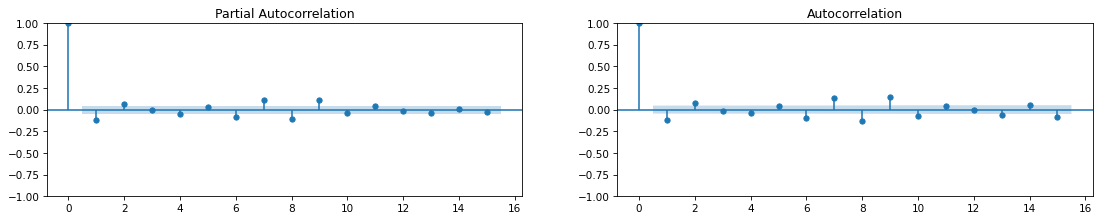

In [1413]:
plt.rcParams.update({'figure.figsize':(18,3), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
plot_pacf(X_train.diff().dropna(), lags = 15, ax=ax[0])
plot_acf(X_train.diff().dropna(), lags = 15, ax=ax[1])
plt.show()

In [1414]:
from pmdarima import auto_arima
S_and_P_price_series = S_and_P['S_and_P Close Price']
stepwise_fit = auto_arima(S_and_P_price_series, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20237.403, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20332.987, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20311.255, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20313.310, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20333.336, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20311.101, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20311.381, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20239.105, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=20312.612, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20310.237, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=20310.929, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20311.913, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=20239.198, Time=1.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=20238.119, Time=0.22 sec

Best model:  ARIMA

In [1415]:
model_S_and_P = sm.tsa.arima.ARIMA(X_train, order = (2,1,1))
S_and_P_010 = model_S_and_P.fit()
print(S_and_P_010.summary())

# Forecast
forecast = S_and_P_010.forecast(steps=202)
actual = S_and_P[1811:]['S_and_P Close Price'].values
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, forecast)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual, forecast))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual - forecast) / actual)) * 100

# Display the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


                                SARIMAX Results                                
Dep. Variable:     S_and_P Close Price   No. Observations:                 1811
Model:                  ARIMA(2, 1, 1)   Log Likelihood               -9115.244
Date:                 Mon, 04 Dec 2023   AIC                          18238.488
Time:                         10:14:34   BIC                          18260.492
Sample:                              0   HQIC                         18246.608
                                - 1811                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1011      0.185     -0.547      0.585      -0.464       0.261
ar.L2          0.0648      0.025      2.590      0.010       0.016       0.114
ma.L1         -0.0091      0.184     -0.050 

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:8

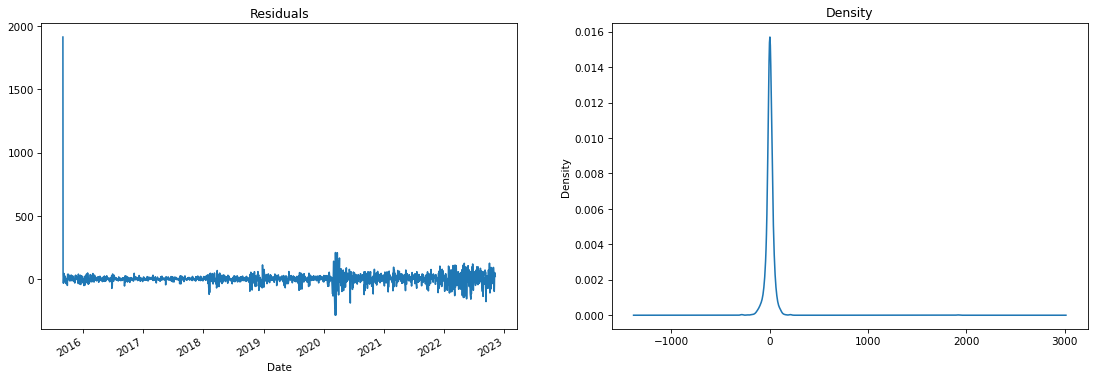

In [1416]:
plt.rcParams.update({'figure.figsize':(18,6), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
residuals = pd.Series(S_and_P_010.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

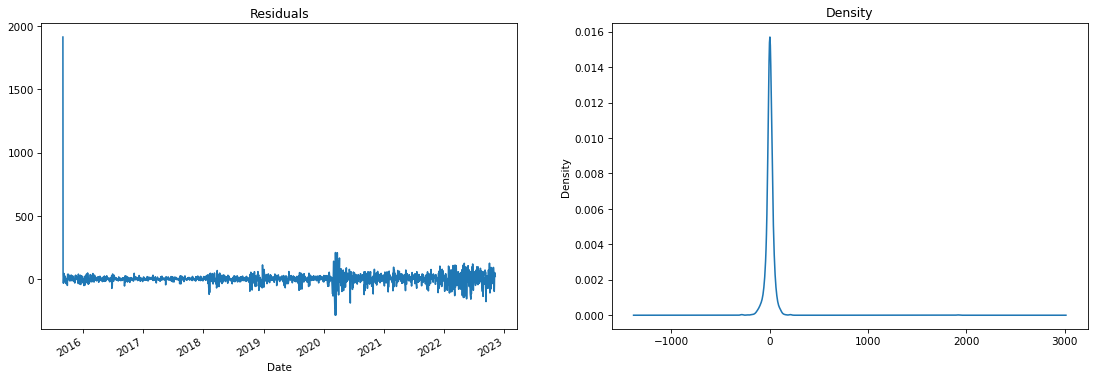

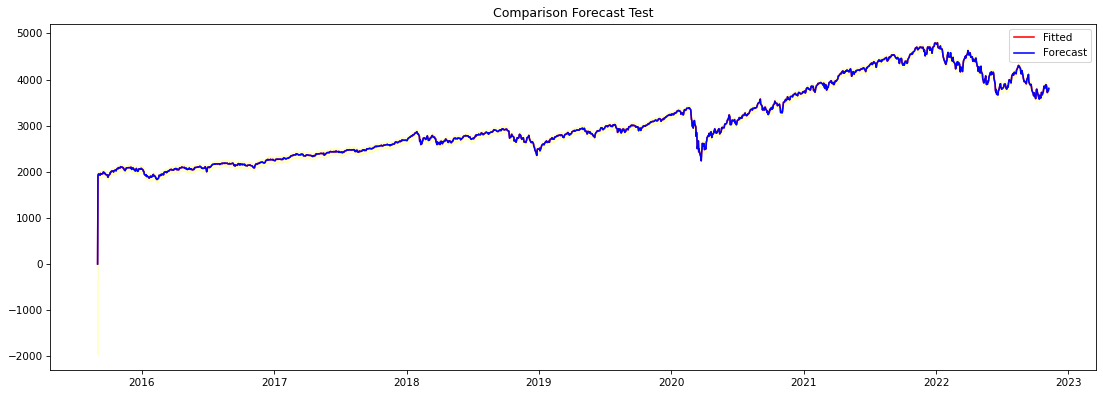

In [1417]:
plt.rcParams.update({'figure.figsize':(18, 6), 'figure.dpi':75})

# Create subplots for residuals
fig, ax = plt.subplots(1,2)

# Assuming S_and_P_010 is a time series model result with a 'resid' attribute
residuals = pd.Series(S_and_P_010.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.show()

# Assuming S_and_P_010 is an ARIMA model result
# Modify the following lines based on your ARIMA model attributes
pred = S_and_P_010.get_prediction(dynamic=False)
pred_ci = pred.conf_int()
# Plotting forecast and confidence intervals
plt.plot(S_and_P_010.fittedvalues, label='Fitted', color='red')
plt.plot(pred.predicted_mean, label='Forecast', color='blue')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='yellow', alpha=0.2)

plt.title('Comparison Forecast Test', fontsize=12)
plt.legend()
plt.show()


In [1418]:
S_and_P_forecast = S_and_P_010.forecast(9)[0]
S_and_P_forecast = pd.Series(S_and_P_forecast, index=index_1_months)
S_and_P_forecast = S_and_P_forecast.rename("Prediction")

fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'Date', y='S_and_P Close Price', data=S_and_P, color = 'blue', marker = '^')
S_and_P_forecast.plot(ax = ax, c = 'red', marker = 'x', label = 'Prediction')
X_test.plot(ax = ax, c = 'yellow')
plt.title('S_and_P Close Price')
plt.legend(loc = 0, fontsize = 15)
plt.show()

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/anish/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



KeyError: 0

In [ ]:
S_and_P_fcast = S_and_P_forecast.to_frame()
S_and_P_fcast.rename_axis("Date", inplace=True)
S_and_P_fcast.reset_index(inplace=True)
S_and_P_fcast

NameError: name 'S_and_P_forecast' is not defined